In [11]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
start_date = '2021-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month
df['day'] = df['ds'].dt.day

for i, row in df.iterrows():
    if row['day'] == 1:
        iday = 23 + np.random.binomial(4, 0.5)
    
    if row['day'] == iday:
        df.loc[i, 'y'] = 1

df = df.drop(['year','month', 'day'], axis=1)

# Format the ds column as yyyy-mm-dd
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')



In [13]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
m.fit(df)

09:55:47 - cmdstanpy - INFO - Chain [1] start processing
09:55:48 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1090,2023-12-27
1091,2023-12-28
1092,2023-12-29
1093,2023-12-30
1094,2023-12-31


In [15]:
forecast = m.predict(future)

Text(0.5, 1.0, 'Monthly Investments Forecast Plot')

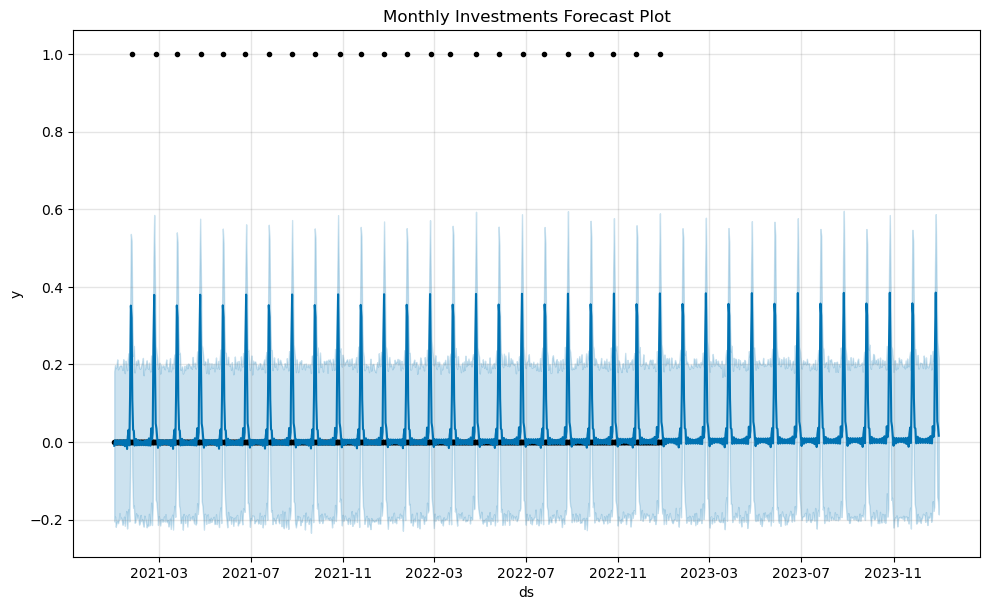

In [16]:
fig1 = m.plot(forecast)
plt.title("Monthly Investments Forecast Plot")

Text(0.5, 1.0, 'Monthly Seasonality')

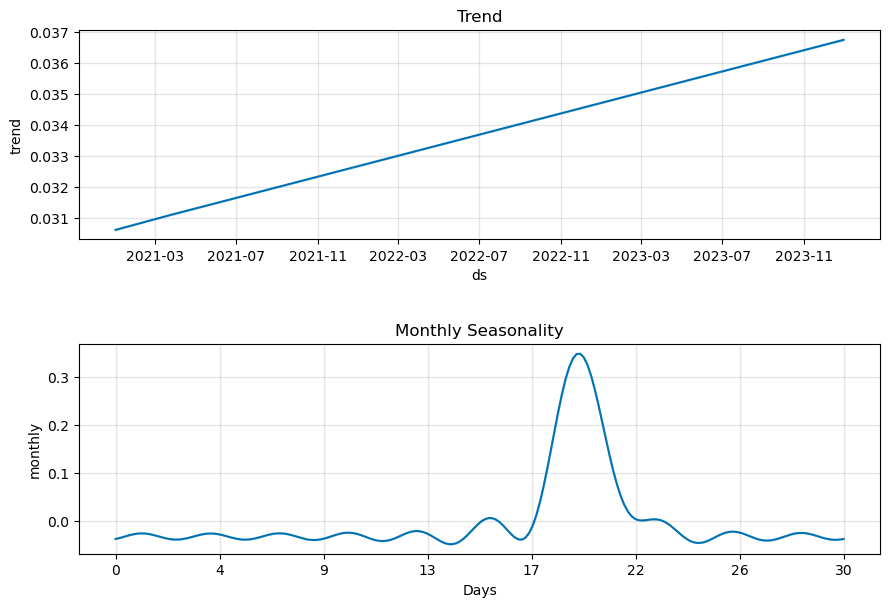

In [19]:
fig2 = m.plot_components(forecast)
plt.subplots_adjust(hspace=0.5)
ax1, ax2 = fig2.get_axes()
ax1.set_title("Trend")
ax2.set_title("Monthly Seasonality")

# 10K AED every 3-5 months

In [20]:
start_date = '2021-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month
df['day'] = df['ds'].dt.day

#set a top limit for while loop
top = len(df)
#set while loop condition
con = 0
#set day of event at 0
d = 0
while con == 0:
    #we randomly choose one day between 62 and 153 using normal distribution
    rd = np.random.normal(loc=107, scale=16, size=1)[0]
    rd = np.round(rd)
    rd = np.clip(rd, 62, 153)

    #add random days to last day of event
    d = d + rd
    #if new day is within range, set y of said day to 10000; otherwise, end loop
    if d < top:
        df['y'][d]=10000
    else:
        con = 1

df = df.drop(['year','month', 'day'], axis=1)

# Format the ds column as yyyy-mm-dd
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')

df[df['y']>0]

/var/folders/_f/fyj5g6rn3s74bjqhs95txbk40000gn/T/ipykernel_91654/735190264.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][d]=10000


,ds,y
113,2021-04-24,10000
200,2021-07-20,10000
316,2021-11-13,10000
394,2022-01-30,10000
503,2022-05-19,10000
607,2022-08-31,10000


21:08:50 - cmdstanpy - INFO - Chain [1] start processing
21:08:50 - cmdstanpy - INFO - Chain [1] done processing


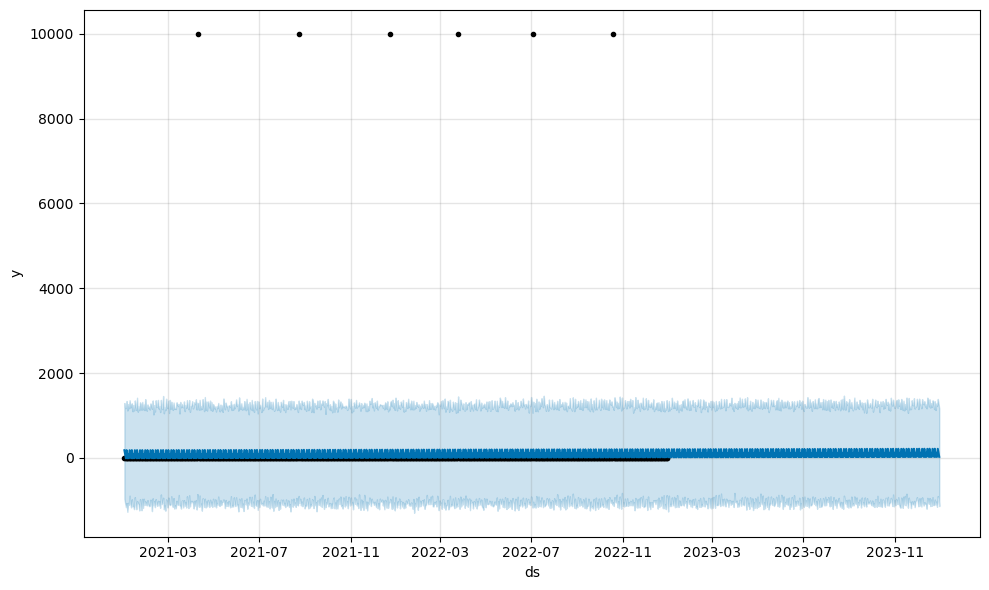

In [62]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)

Normal model is not doing so well. We will try to remove all 0 values

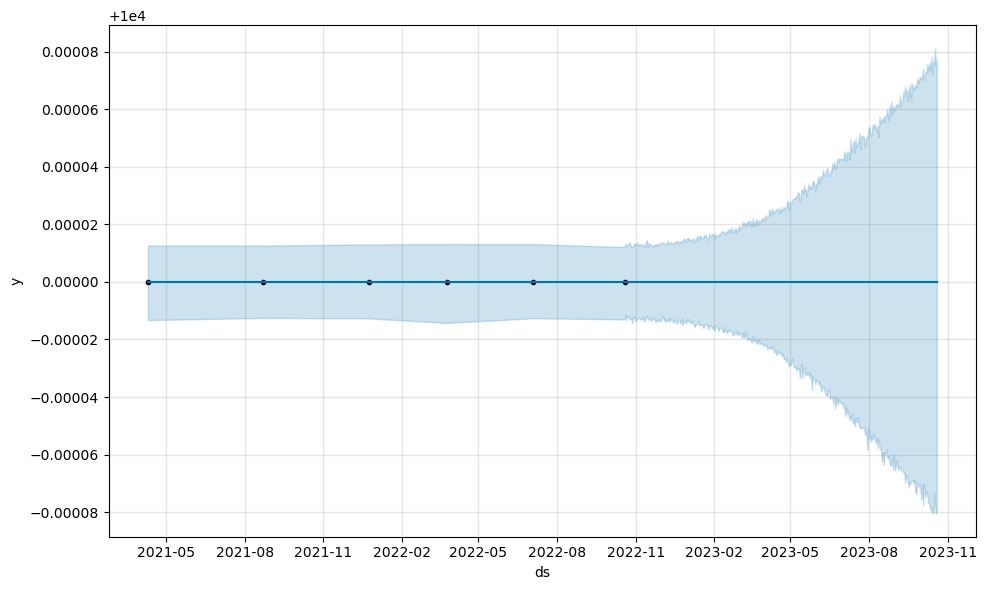

In [63]:
df = df[df['y'] != 0]
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)

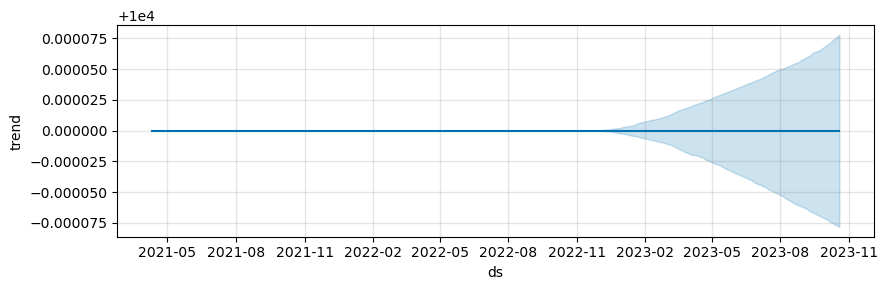

In [65]:
fig2 = m.plot_components(forecast)

Results are abysmal. We will try now changing df into 01-mm-yyyy

In [21]:
start_date = '2021-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month
df['day'] = df['ds'].dt.day

#set a top limit for while loop
top = len(df)
#set while loop condition
con = 0
#set day of event at 0
d = 0
while con == 0:
    #we randomly choose one day between 62 and 153 using normal distribution
    rd = np.random.normal(loc=107, scale=16, size=1)[0]
    rd = np.round(rd)
    rd = np.clip(rd, 62, 153)

    #add random days to last day of event
    d = d + rd
    #if new day is within range, set y of said day to 10000; otherwise, end loop
    if d < top:
        df['y'][d]=10000
    else:
        con = 1

df = df.drop(['day'], axis=1)

monthly_sum = df.groupby(['year', 'month'])['y'].sum()

# Reset the index and create a new ds column
monthly_sum = monthly_sum.reset_index()
monthly_sum['ds'] = monthly_sum.apply(lambda x: pd.to_datetime(f"{x['year']}-{x['month']}-01"), axis=1)

# Select only the ds and y columns
df = monthly_sum[['ds', 'y']]


/var/folders/_f/fyj5g6rn3s74bjqhs95txbk40000gn/T/ipykernel_91654/1755834790.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][d]=10000


10:07:19 - cmdstanpy - INFO - Chain [1] start processing
10:07:20 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Customer Invests 10K AED Every 3-5 months Forecast Plot')

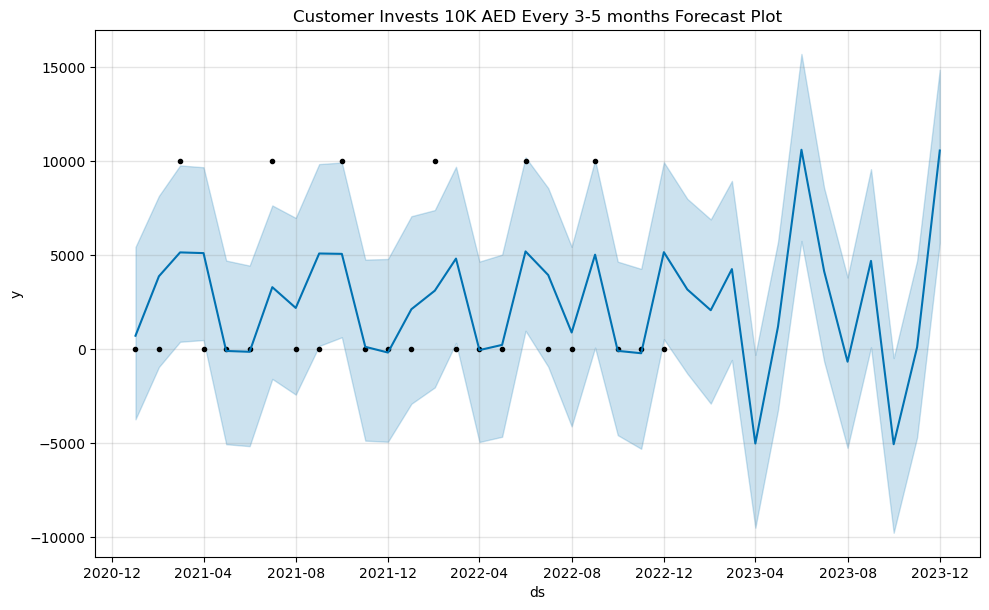

In [22]:
m = Prophet()
m.add_seasonality(name='semi_annually', period=30.5*6, fourier_order=5)
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.title("Customer Invests 10K AED Every 3-5 months Forecast Plot")

Text(0.5, 1.0, 'Semi-Annual Seasonality')

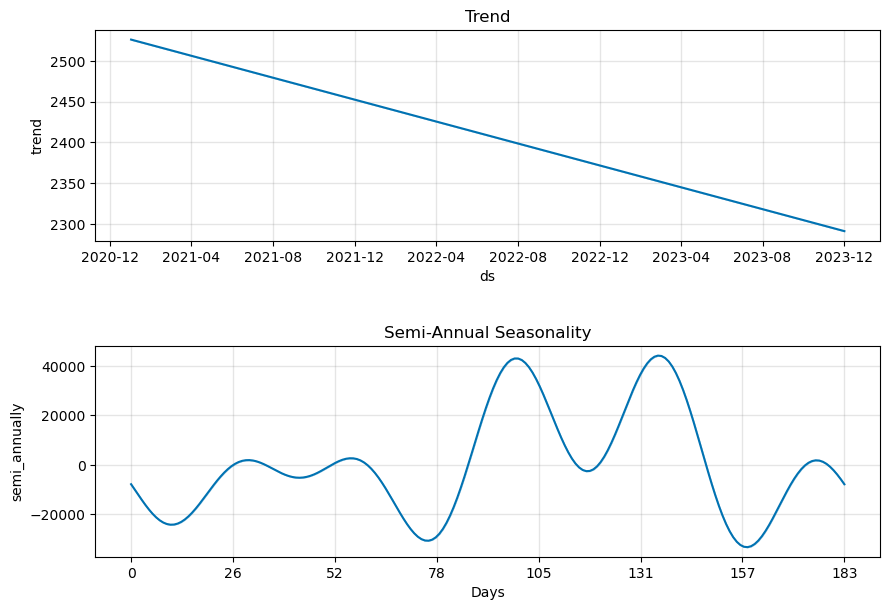

In [23]:
fig2 = m.plot_components(forecast)
plt.subplots_adjust(hspace=0.5)
ax1, ax2 = fig2.get_axes()
ax1.set_title("Trend")
ax2.set_title("Semi-Annual Seasonality")

Periods are random; causing chaos.

# Small amounts every few weeks

In [24]:
start_date = '2021-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month
df['day'] = df['ds'].dt.day

#set a top limit for while loop
top = len(df)
#set while loop condition
con = 0
#set day of event at 0
d = 0
while con == 0:
    #we randomly choose one day between 14 and 28 using normal distribution
    rd = np.random.normal(loc=21, scale=4, size=1)[0]
    rd = np.round(rd)
    rd = np.clip(rd, 14, 28)

    #add random days to last day of event
    d = d + rd
    #if new day is within range, set y of said day to around 1000; otherwise, end loop
    if d < top:
        df['y'][d]=1000 + np.random.normal(loc=100, scale=50, size=1)[0]
    else:
        con = 1

df = df.drop(['year','month', 'day'], axis=1)

# Format the ds column as yyyy-mm-dd
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')

df[df['y']>0]

/var/folders/_f/fyj5g6rn3s74bjqhs95txbk40000gn/T/ipykernel_91654/3826179123.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][d]=1000 + np.random.normal(loc=100, scale=50, size=1)[0]


,ds,y
14,2021-01-15,1195.182708
40,2021-02-10,1083.067751
60,2021-03-02,1159.443248
78,2021-03-20,1030.223910
93,2021-04-04,1001.999578
110,2021-04-21,1141.983778
131,2021-05-12,1211.299995
149,2021-05-30,1149.483144
168,2021-06-18,1122.091945
191,2021-07-11,1080.274400


10:13:01 - cmdstanpy - INFO - Chain [1] start processing
10:13:01 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Customer Invests 1k AED Every 3-4 Weeks Forecast Plot')

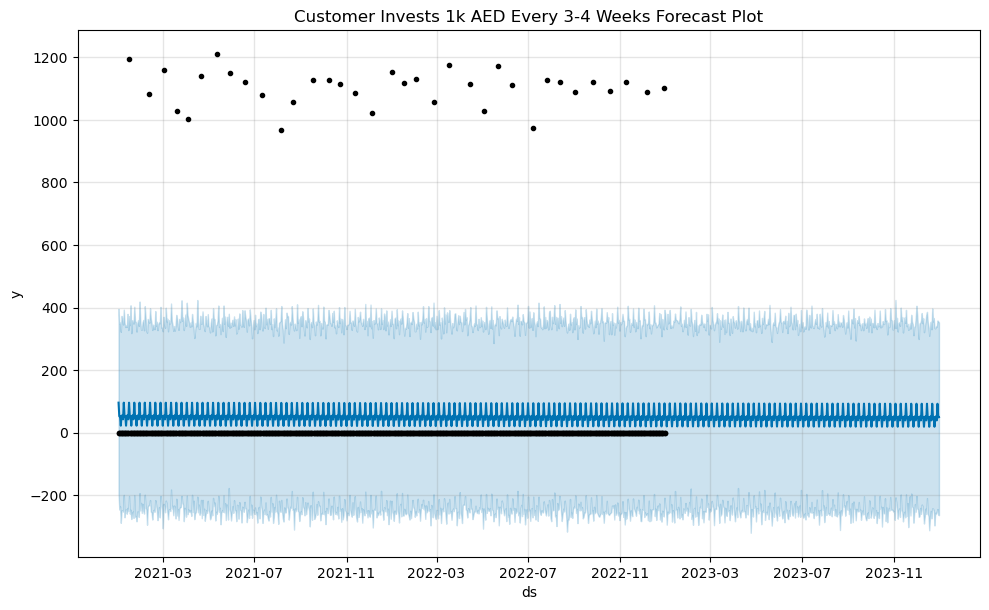

In [25]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.title("Customer Invests 1k AED Every 3-4 Weeks Forecast Plot")

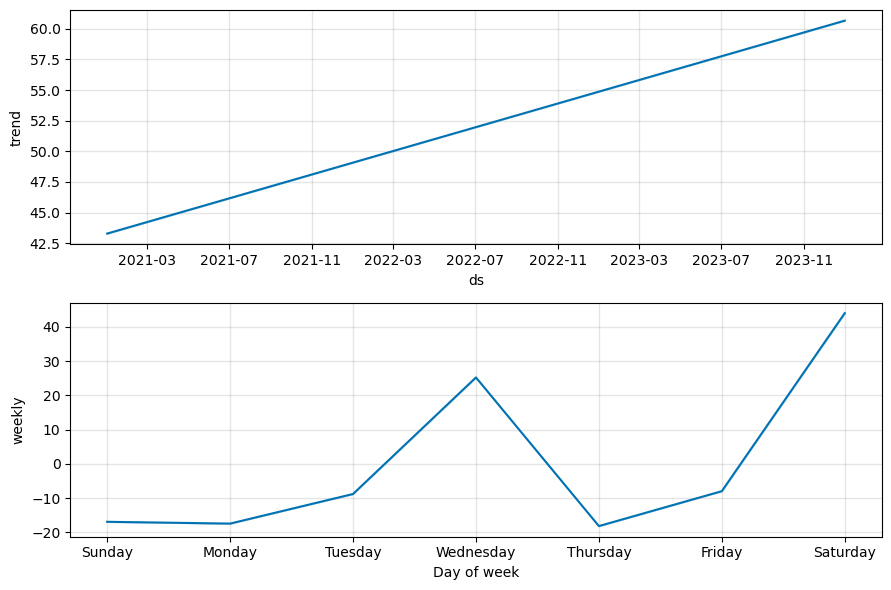

In [102]:
fig2 = m.plot_components(forecast)
plt.subplots_adjust(hspace=0.5)
ax1, ax2 = fig2.get_axes()
ax1.set_title("Trend")
ax2.set_title("Weekly Seasonality")

Weekly seems like a bad idea. I will add a 9 week period instead

10:14:39 - cmdstanpy - INFO - Chain [1] start processing
10:14:39 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Customer Invests 1k AED Every 3-4 Weeks Forecast Plot')

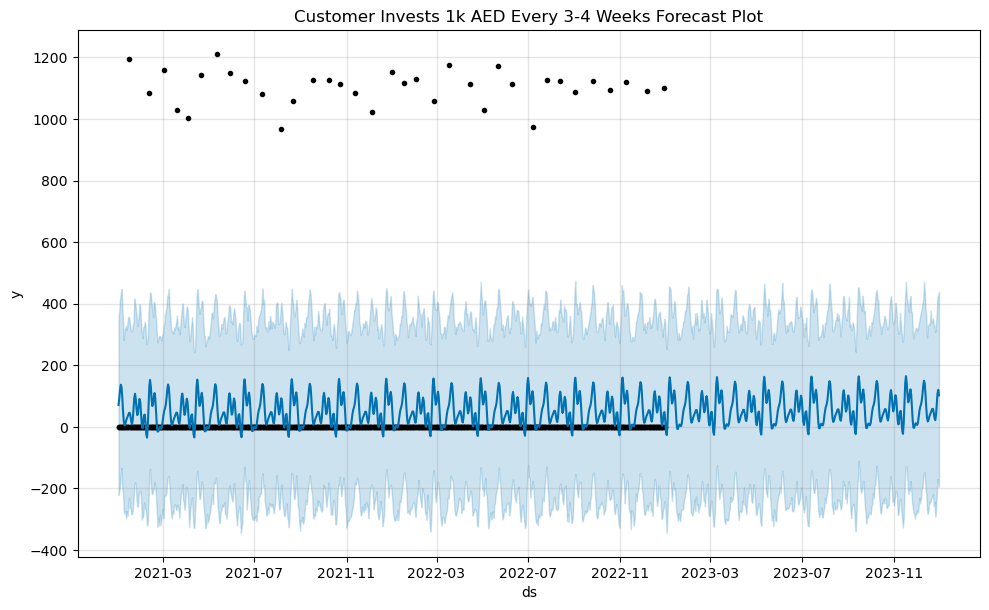

In [26]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='9_weeks', period=7*9, fourier_order=10)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.title("Customer Invests 1k AED Every 3-4 Weeks Forecast Plot")

Text(0.5, 1.0, '9-Week Seasonality')

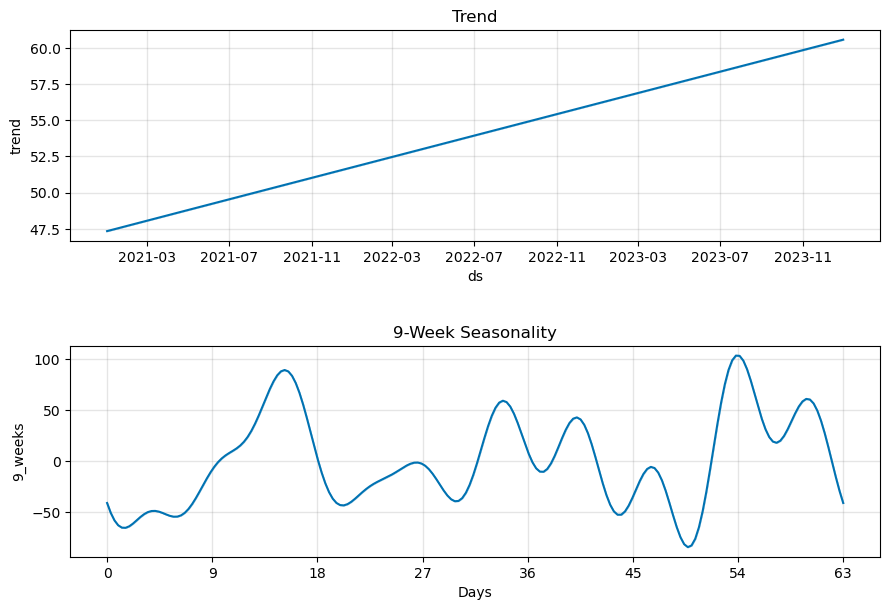

In [27]:
fig2 = m.plot_components(forecast)
plt.subplots_adjust(hspace=0.5)
ax1, ax2 = fig2.get_axes()
ax1.set_title("Trend")
ax2.set_title("9-Week Seasonality")

In [105]:
df['ds']

0      2021-01-01
1      2021-01-02
2      2021-01-03
3      2021-01-04
4      2021-01-05
          ...    
725    2022-12-27
726    2022-12-28
727    2022-12-29
728    2022-12-30
729    2022-12-31
Name: ds, Length: 730, dtype: object

In [28]:
df['ds'] = pd.to_datetime(df['ds'])

In [29]:
df = df.set_index('ds')

In [30]:
weekly_sum = df.resample('W')['y'].sum()

In [31]:
# Reset the index of the weekly_sum DataFrame
weekly_sum = weekly_sum.reset_index()

# Print the resulting weekly sum DataFrame
print(weekly_sum)

            ds            y
0   2021-01-03     0.000000
1   2021-01-10     0.000000
2   2021-01-17  1195.182708
3   2021-01-24     0.000000
4   2021-01-31     0.000000
..         ...          ...
100 2022-12-04     0.000000
101 2022-12-11  1089.954650
102 2022-12-18     0.000000
103 2022-12-25     0.000000
104 2023-01-01  1101.134196

[105 rows x 2 columns]


10:19:21 - cmdstanpy - INFO - Chain [1] start processing
10:19:21 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Customer Invests 1k AED Every 3-4 Weeks Forecast Plot')

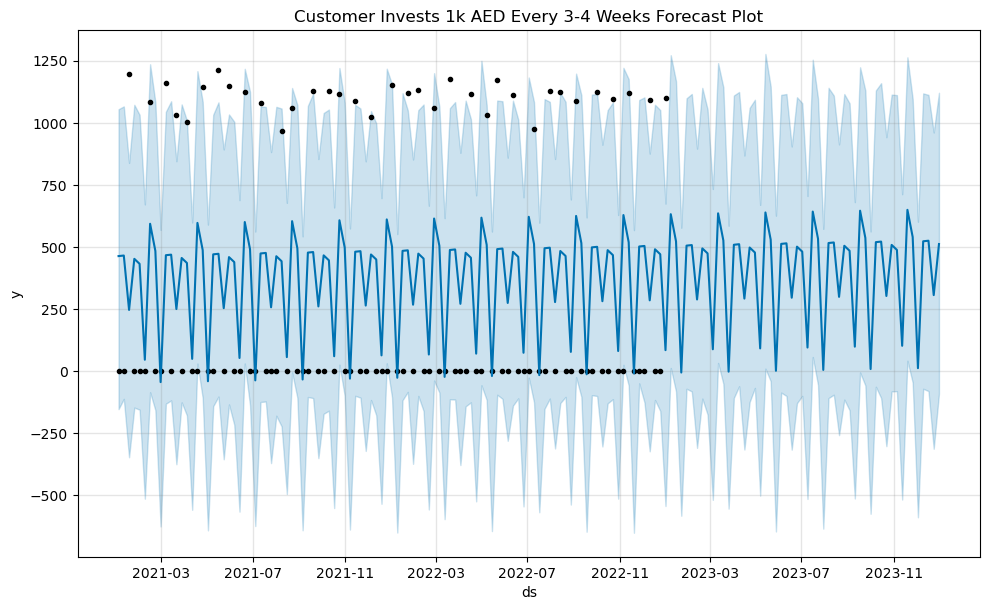

In [32]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='9_weeks', period=7*9, fourier_order=10)
m.fit(weekly_sum)
future = m.make_future_dataframe(periods=52, freq = 'W')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.title("Customer Invests 1k AED Every 3-4 Weeks Forecast Plot")

Text(0.5, 1.0, '9-Week Seasonality')

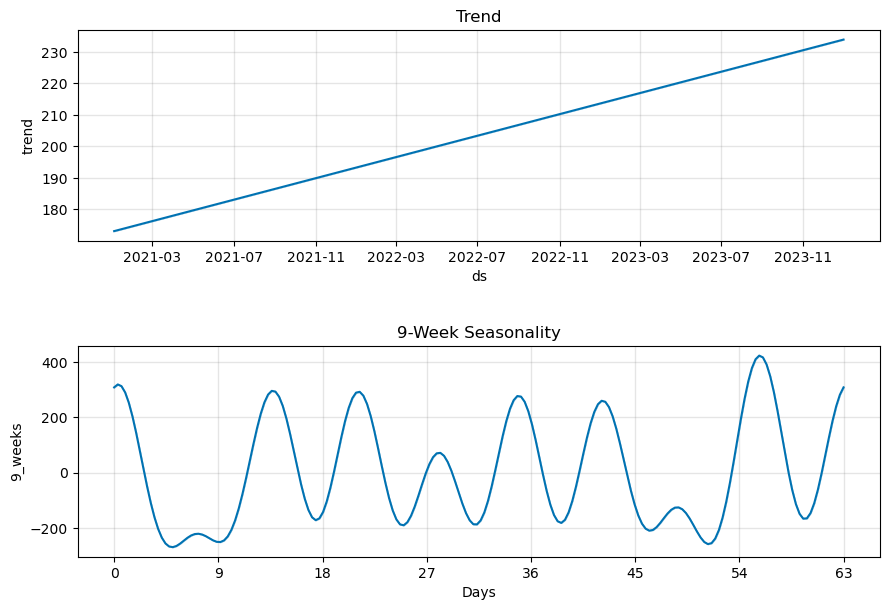

In [33]:
fig2 = m.plot_components(forecast)
plt.subplots_adjust(hspace=0.5)
ax1, ax2 = fig2.get_axes()
ax1.set_title("Trend")
ax2.set_title("9-Week Seasonality")

Well...

# Two large amounts each year for the past 3 years

Assume 6 months interval

In [34]:
start_date = '2019-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='M')
df = pd.DataFrame({'ds': date_range, 'y': 0})

# Create a column for the month and day
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month

# Set the y value to 1000000 for months 6 and 12
df.loc[(df['month'] == 6) | (df['month'] == 12), 'y'] = np.random.normal(loc=1000000, scale=300000, size=8)

df = df.drop(['year','month'], axis=1)

# Format the ds column as yyyy-mm-dd
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')

df[df['y']>0]

,ds,y
5,2019-06-30,8.535569e+05
11,2019-12-31,9.504851e+05
17,2020-06-30,9.081196e+05
23,2020-12-31,1.341049e+06
29,2021-06-30,7.970379e+05
35,2021-12-31,1.168867e+06
41,2022-06-30,1.285545e+06
47,2022-12-31,5.465997e+05


10:29:18 - cmdstanpy - INFO - Chain [1] start processing
10:29:18 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Customer Invests 1M AED Semi-Annually Forecast Plot')

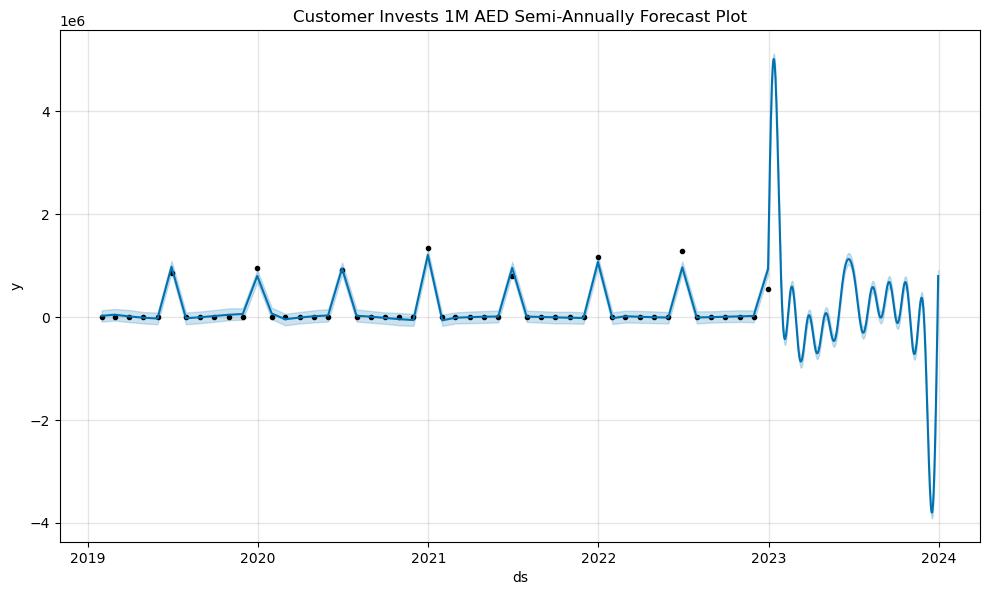

In [35]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.title("Customer Invests 1M AED Semi-Annually Forecast Plot")

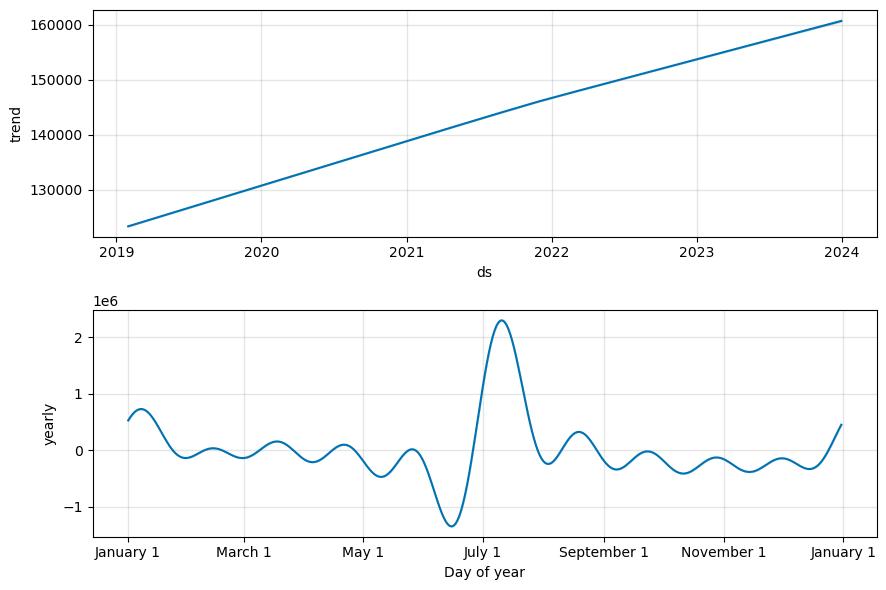

In [131]:
fig2 = m.plot_components(forecast)
plt.subplots_adjust(hspace=0.5)
ax1, ax2 = fig2.get_axes()
ax1.set_title("Trend")
ax2.set_title("Semi-Annual Seasonality")

Seems like cutoff makes a problem, and fourier needs more. We will try to do biannual period and more fourier.

10:32:00 - cmdstanpy - INFO - Chain [1] start processing
10:32:01 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Customer Invests 1M AED Semi-Annually Forecast Plot')

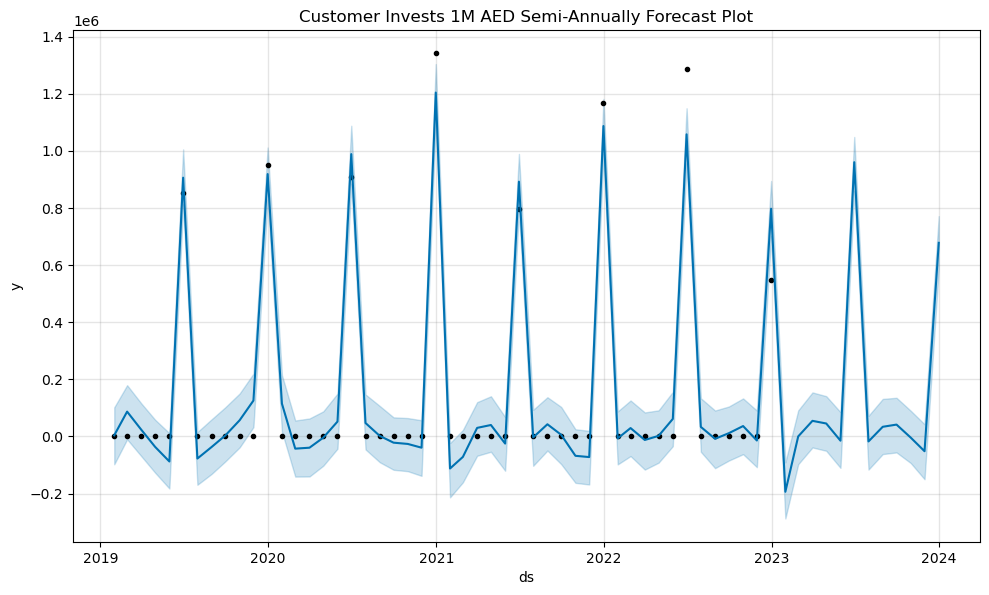

In [36]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='biannual', period=365*2, fourier_order=5)
m.fit(df)
future = m.make_future_dataframe(periods=12, freq = 'M')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.title("Customer Invests 1M AED Semi-Annually Forecast Plot")

Text(0.5, 1.0, 'Bi-Annual Seasonality')

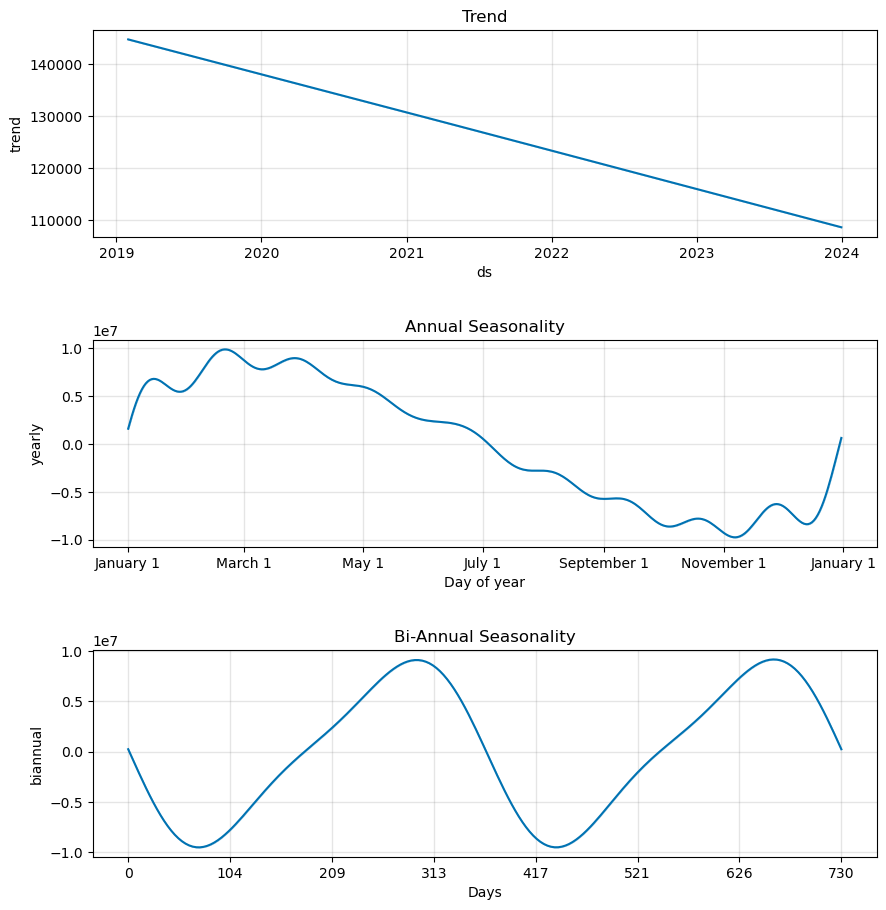

In [37]:
fig2 = m.plot_components(forecast)
plt.subplots_adjust(hspace=0.5)
ax1, ax2, ax3 = fig2.get_axes()
ax1.set_title("Trend")
ax2.set_title("Annual Seasonality")
ax3.set_title("Bi-Annual Seasonality")

23:54:19 - cmdstanpy - INFO - Chain [1] start processing
23:54:19 - cmdstanpy - INFO - Chain [1] done processing


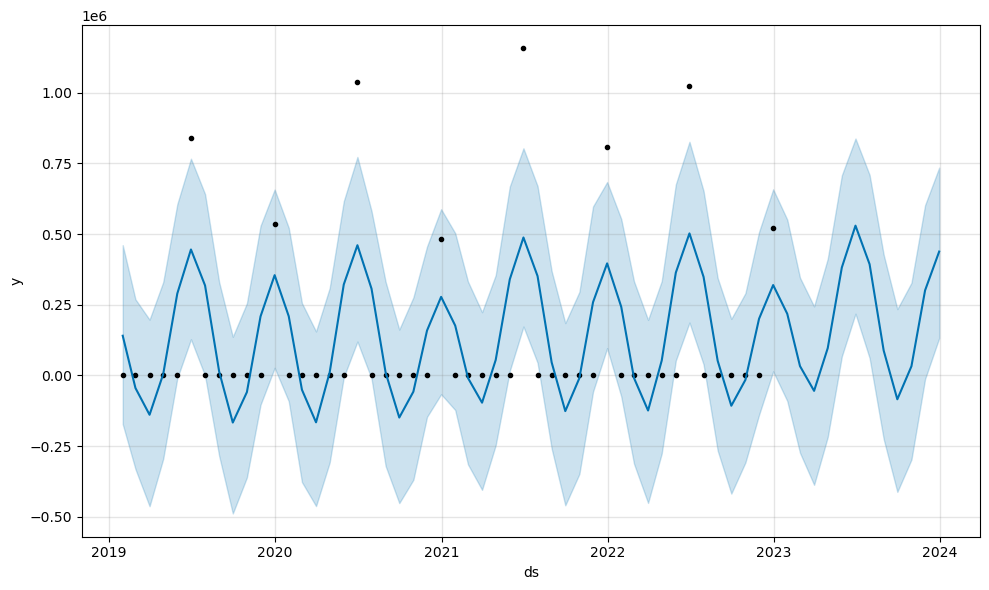

In [137]:
m = Prophet(yearly_seasonality=False)
m.add_seasonality(name='biannual', period=365*2, fourier_order=5)
m.fit(df)
future = m.make_future_dataframe(periods=12, freq = 'M')
forecast = m.predict(future)
fig1 = m.plot(forecast)

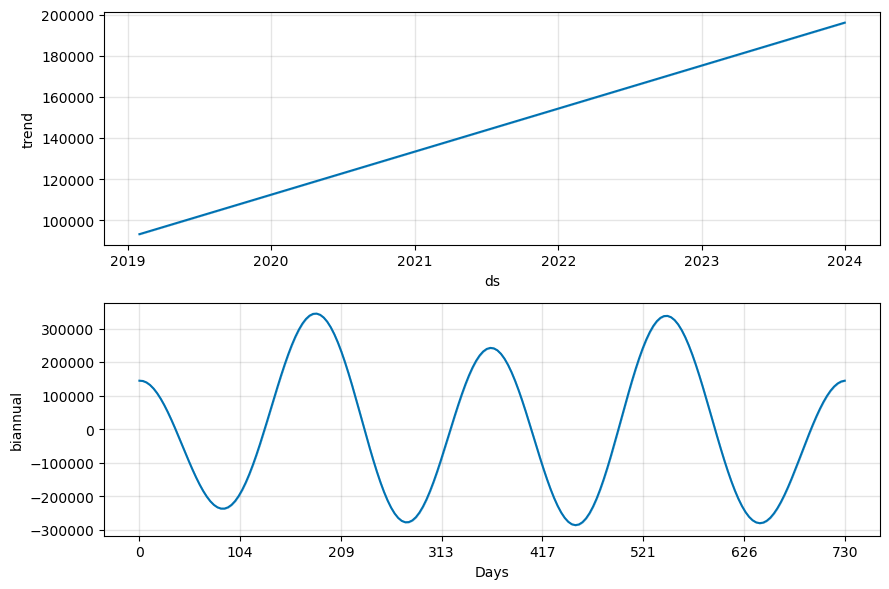

In [138]:
fig2 = m.plot_components(forecast)